In [24]:
# fit and evaluate an AR model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy
from math import sqrt

In [25]:
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)

In [26]:
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat

In [32]:
series = read_csv('Food_availability.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = difference(series.values)
size = int(len(X) * 0.8)
train, test = X[size:], X[0:size]

In [40]:
# train autoregression
window = 2
model = AutoReg(train, lags=1)
model_fit = model.fit()
coef = model_fit.params

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [41]:
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(coef, history)
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1482.764


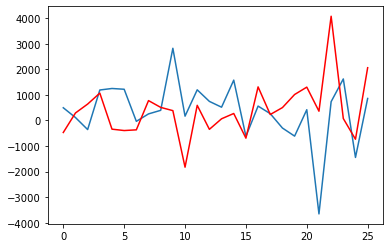

In [42]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [43]:
# fit an AR model and save the whole model to file
from pandas import read_csv
from statsmodels.tsa.ar_model import AutoReg
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
series = read_csv('Food_availability.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = difference(series.values)
# fit model
model = AutoReg(X, lags=6)
model_fit = model.fit()
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
numpy.save('ar_data.npy', X)
# save the last ob
numpy.save('ar_obs.npy', [series.values[-1]])

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [44]:
# load the AR model from file
from statsmodels.tsa.ar_model import AutoRegResults
import numpy
loaded = AutoRegResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

[ 1.88868663e+02 -2.25976215e-01 -7.24770770e-03  3.27995886e-01
  8.55155204e-02  5.04066161e-02  8.33342620e-02]
[19817.747]


In [45]:
# fit an AR model and manually save coefficients to file
from pandas import read_csv
from statsmodels.tsa.ar_model import AutoReg
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
series = read_csv('Food_availability.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = difference(series.values)
# fit model
window_size = 2
model = AutoReg(X, lags=window_size)
model_fit = model.fit()
# save coefficients
coef = model_fit.params
numpy.save('man_model.npy', coef)
# save lag
lag = X[-window_size:]
numpy.save('man_data.npy', lag)
# save the last ob
numpy.save('man_obs.npy', [series.values[-1]])

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [46]:
# load the manually saved model from file
import numpy
coef = numpy.load('man_model.npy')
print(coef)
lag = numpy.load('man_data.npy')
print(lag)
last_ob = numpy.load('man_obs.npy')
print(last_ob)

[ 4.56777161e+02 -1.54339788e-01 -2.95253590e-02]
[-512.055 1332.25 ]
[19817.747]


In [47]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import AutoRegResults
import numpy
# load model
model = AutoRegResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 20011.292508


In [48]:
# load a coefficients and from file and make a manual prediction
import numpy
 
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat
 
# load model
coef = numpy.load('man_model.npy')
lag = numpy.load('man_data.npy')
last_ob = numpy.load('man_obs.npy')
# make prediction
prediction = predict(coef, lag)
# transform prediction
yhat = prediction + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 20084.023587


In [49]:
# update the data for the AR model with a new obs
import numpy
# get real observation
observation = 48
# load the saved data
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# update and save differenced observation
diffed = observation - last_ob[0]
data = numpy.append(data, [diffed], axis=0)
numpy.save('ar_data.npy', data)
# update and save real observation
last_ob[0] = observation
numpy.save('ar_obs.npy', last_ob)

In [50]:
# update the data for the manual model with a new obs
import numpy
# get real observation
observation = 48
# update and save differenced observation
lag = numpy.load('man_data.npy')
last_ob = numpy.load('man_obs.npy')
diffed = observation - last_ob[0]
lag = numpy.append(lag[1:], [diffed], axis=0)
numpy.save('man_data.npy', lag)
# update and save real observation
last_ob[0] = observation
numpy.save('man_obs.npy', last_ob)

<ipython-input-53-f0d288eae47a>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                   34
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -276.342
Date:                Sat, 30 Apr 2022   AIC                            564.685
Time:                        17:25:56   BIC                            573.664
Sample:                    01-31-1980   HQIC                           567.706
                         - 01-31-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0899      0.284     -0.316      0.752      -0.647       0.467
ar.L2          0.0092      0.152      0.060      0.952      -0.289       0.308
ar.L3          0.2436      0.189      1.288      0.1

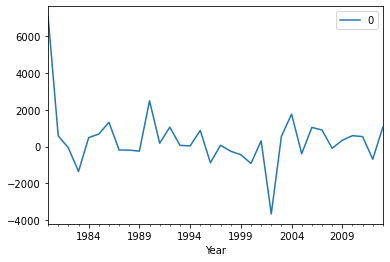

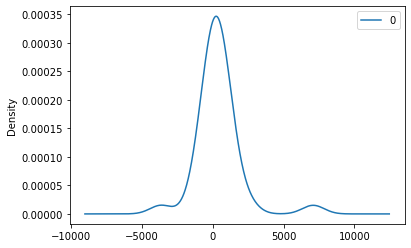

                 0
count    34.000000
mean    370.038137
std    1572.281725
min   -3664.690702
25%    -237.435571
50%     243.113005
75%     826.403346
max    7084.251000


In [53]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
series = read_csv('Food_availability.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

<ipython-input-54-8c291988f519>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=18570.517502, expected=14682.896000
predicted=14820.293356, expected=15416.441000
predicted=14611.661413, expected=17038.522000
predicted=16652.638883, expected=15591.447000
predicted=15123.519618, expected=16449.752000
predicted=15751.545116, expected=17216.969000
predicted=17192.853532, expected=17069.987000
predicted=17344.078733, expected=17657.946000
predicted=17641.873093, expected=18296.147000
predicted=18451.733439, expected=18997.552000
predicted=19196.877445, expected=18485.497000
predicted=18722.274267, expected=19817.747000
Test RMSE: 1552.870


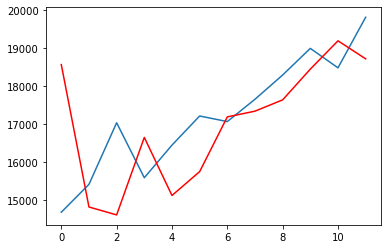

In [54]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('Food_availability.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()